# Conceptual

### Question1:

$$ Var(\alpha X +(1-\alpha) Y)=\alpha^{2}*Var(X)+(1-\alpha)^{2}*Var(Y)+2\alpha(1-\alpha)*Cov(X,Y) $$
$$ =\alpha^{2}*\sigma_{X}^{2}+(1-\alpha)^{2}*\sigma_{Y}^{2}+2\alpha(1-\alpha)*\sigma_{XY} $$
$$ =\alpha^{2}*\sigma_{X}^{2}+(1-2*\alpha+\alpha^{2})*\sigma_{Y}^{2}+2(\alpha-\alpha^{2})*\sigma_{XY} $$
We now take the fist derivative of Var(αX+(1−α)Y) relative to α and equals it to 0 to get points where the values for Var(αX+(1−α)Y) is minimum 
$$ \frac{\partial}{\partial(\alpha)}Var(\alpha X +(1-\alpha) Y)=2\alpha*\sigma_{X}^{2}+(-2+2\alpha)*\sigma_{Y}^{2}+2(1-2\alpha)*\sigma_{XY} $$
$$ =2\alpha(\sigma_{X}^{2}+\sigma_{Y}^{2}-2\sigma_{XY})-2(\sigma_{Y}^{2}- \sigma_{XY})=0$$

$$ \alpha=\frac{(\sigma_{Y}^{2}- \sigma_{XY})}{(\sigma_{X}^{2}+\sigma_{Y}^{2}-2\sigma_{XY})}$$
To check if this value is minimum we will take the second derivative of Var(αX+(1−α)Y)
$$ \frac{\partial^{2}}{\partial\alpha^{2}}Var(\alpha X +(1-\alpha) Y) =2(\sigma_{X}^{2}+\sigma_{Y}^{2}-2\sigma_{XY})$$
$$=2Var(X-Y)>=0$$

### Question2:

$$a)1-1/n$$
$$b)1-1/n$$
$$c)\space As\space bootstrapping\space sample\space with\space replacement,\space we\space have\space that\space the\space probability\space that\space the\space jth\space observation\space is\space not\space in\space the\space bootstrap\space sample\space is\space the\space product\space of\space the\space probabilities\space that\space each\space bootstrap\space observation\space is\space not\space the\space jth\space observation\space from\space the\space original\space sample$$
$$(1−1/n)⋯(1−1/n)=(1−1/n)^{n}$$
$$d)1-(1-1/5)^{5}=0.67232$$
$$e)1-(1-1/100)^{100}=0.634$$
$$e)1-(1-1/10000)^{10000}=0.632$$

In [117]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
x=list(np.arange(1,100000,1))


In [119]:
y=[1-((1-1/i)**i) for i in x]


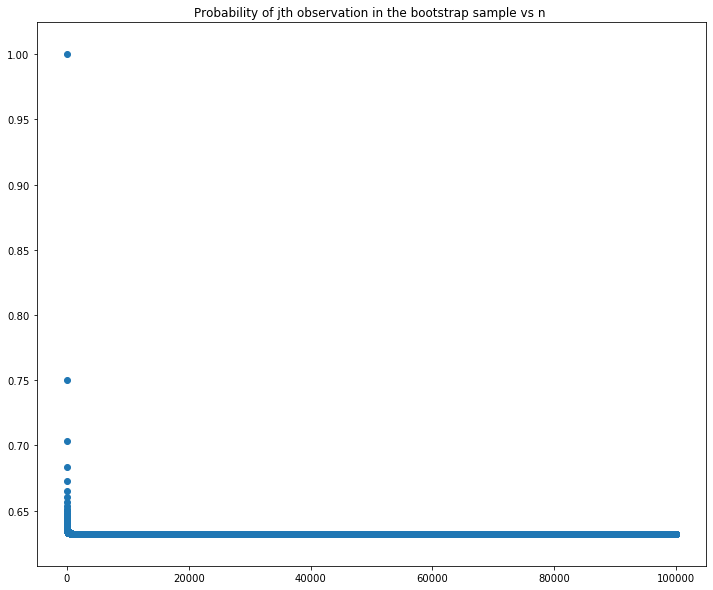

In [120]:
plt.figure(figsize=(12,10))
plt.scatter(x,y)
plt.title("Probability of jth observation in the bootstrap sample vs n ")
plt.show()

In [121]:
#H)
import random
random.seed(60)#to generate the same output each time
n = 100
N = 10000
count = 0

for i in range(N):
    
    count += 4 in random.choices(range(1,n+1), k=n) #1 if 4 in the bootstrap sample 0 otherwise

print(count/N)

0.6274


### Question3:

##### a)The k-fold cross validation algorithm steps:
- Splitting n observations into k non-overlapping groups of length (n/k) approximately.
- Fit our model with dataset of length (n−n/k) acts as a training set and the left-out dataset with n/k observations as our validation set.
- For each of these k model fits, we use the left-out fold to calculate the validation error. Finally, the average of the k validation errors is the estimate of the test error.


##### b)
###### i)The k-fold cross validation vs validation set approach:
Advantages of validation set: 
- Requires less computation. 
- Simpler and easier to implement.


Disadvantages of Validation set: 
- The validation set approach tends to overestimate the test error since it only uses half the sample to fit the model (in general a larger sample size leads to lower test error).
- fitting only half the model will make the test error estimate dependent on which half of the sample we choose.


###### ii)The k-fold cross validation vs LOOCV:
Advantages of LOOCV: 
- Uses almost all of the points of the data set so it has far less bias. 

Disadvantages of LOOCV: 
- Due to the bias-variance trade off as the bias is small then this method has more variance than k-fold cross validation since we are averaging the outputs of n fitted models trained on an almost identical set of observations, these outputs are highly correlated, and the mean of highly correlated quantities has higher variance than less correlated ones


### Question4:

We may use the bootstrap method.In this case, rather than obtaining new independant data sets from the population and fitting our model on those data sets, we instead obtain repeated random samples from the original data set.
In this case, we perform sampling with replacement and then find the corresponding estimates and the standard deviation of those estimates and we could have the distribution of the estimates and other measurments(mean,confidence interval,....etc).

### Question5:

In [122]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
%matplotlib inline

In [123]:
default_df=pd.read_csv('./csv/Default.csv')
default_df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [124]:
default_df['default_yes']=default_df['default'].apply(lambda x:1 if x=='Yes' else 0)#mapping defaults values
default_df['student_yes']=default_df['student'].apply(lambda x:1 if x=='Yes' else 0)#mapping student variable

In [125]:
X=default_df[['balance','income']]
Y=default_df['default_yes']


In [126]:
#a)
model_1 = LogisticRegression(random_state=0, tol=1e-6).fit(X, Y)

In [127]:
model_1.intercept_

array([-11.54047811])

In [128]:
model_1.coef_

array([[5.64710797e-03, 2.08091984e-05]])

In [129]:
#b)i) ii) iii)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
model_2= LogisticRegression(random_state=0, tol=1e-6).fit(X_train,y_train)
predictions=model_2.predict(X_test)

In [130]:
validation_error=(1-((y_test==predictions).mean()))*100
print(validation_error)

2.759999999999996


So our general test error is 2.76%.

In [131]:
#C)

def c_function(features,output):
    #print(features)
    #print(output)
    X_train, X_test, y_train, y_test = train_test_split(features, output, test_size=0.5)
    model= LogisticRegression(random_state=0, tol=1e-6).fit(X_train,y_train)
    predictions=model.predict(X_test)
    conf_mat = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=['No','Yes'])
    disp.plot(values_format="2g");
    validation_error=(1-((y_test==predictions).mean()))*100
    return validation_error

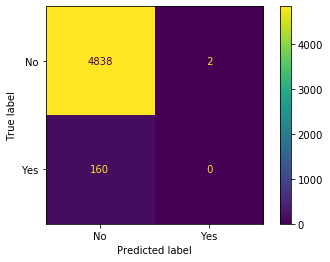

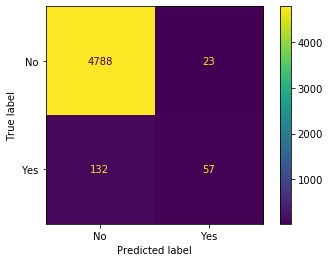

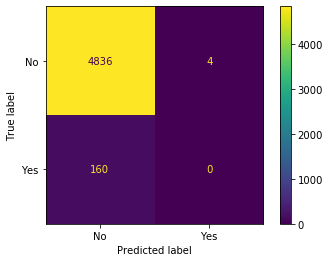

In [132]:
test_estimated_errors=[]
for i in range(3):
    #print(i)
    test_estimated_errors.append(c_function(X,Y))

In [133]:
test_estimated_errors

[3.2399999999999984, 3.1000000000000028, 3.280000000000005]

We see that the validation estimate of the test error rate can be variable, depending on which observations are included in the training set and which observations are included in the validation set.

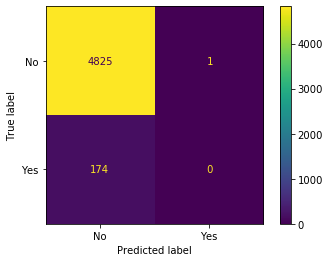

In [134]:
#D)
X_D=default_df[['balance','income','student_yes']]
Y_D=default_df['default_yes']
validation_error=c_function(X_D,Y_D)

In [135]:
validation_error

3.500000000000003

We see that adding the dummy variable student doesn't actually lead to a reduction in the test error rate

### Question 6:

In [136]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf # we use here the statsmodels library because it gives us the standard errors for the coefficients directly
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
%matplotlib inline

In [137]:

formula = 'default_yes ~ balance+income'
log_reg = smf.glm(formula = formula, data=default_df, family=sm.families.Binomial()).fit()
print(log_reg.summary())
statsmodels_est = pd.DataFrame({'coef_sm': log_reg.params, 'std_sm': log_reg.bse})
statsmodels_est.reset_index(drop=True,inplace=True)
display(statsmodels_est)

                 Generalized Linear Model Regression Results                  
Dep. Variable:            default_yes   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -789.48
Date:                Wed, 07 Jul 2021   Deviance:                       1579.0
Time:                        07:47:38   Pearson chi2:                 6.95e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.0

,coef_sm,std_sm
0,-11.540468,0.434772
1,0.005647,0.000227
2,0.000021,0.000005


In [138]:
#B)
def boot_fn(data,index):
    response   = 'default_yes'
    predictors = ['balance', 'income']
    
    X = sm.add_constant(np.array(default_df[predictors].loc[index]));
    y = np.array(default_df[response].loc[index]) 

    log_reg = sm.Logit(y, X).fit(disp=False);  
    return log_reg.params;

In [139]:
def samples_idx(n):
    # return the index of bootstrap sample with size n and replacement
     return np.random.randint(low=0, high=n, size=n)

def boot(fn,data,samples):
    results = []
    for s in range(samples):
        Z = fn(data, samples_idx(data.shape[0]))
        results += [Z]
    return np.array(results)
def standard_deviation(X):
    X_mean = np.mean(X, axis=0)
    std = np.sqrt((np.sum(np.square(X - X_mean), axis=0)) / (len(X)))
    return std

B = 5000
coef_preds    = boot(boot_fn, default_df, samples=B)
coef_pred     = np.mean(coef_preds, axis=0)
standard_errs = standard_deviation(coef_preds)

bootstrap_est = pd.DataFrame({'coef_boot': coef_pred, 'std_boot': standard_errs})
display(bootstrap_est)

,coef_boot,std_boot
0,-11.567333,0.430063
1,0.005662,0.000227
2,0.000021,0.000005


In [140]:
pd.concat([statsmodels_est, bootstrap_est], axis=1)

,coef_sm,std_sm,coef_boot,std_boot
0,-11.540468,0.434772,-11.567333,0.430063
1,0.005647,0.000227,0.005662,0.000227
2,0.000021,0.000005,0.000021,0.000005


The estimated standard errors obtained by the two methods are pretty close.

### Question7:

In [141]:
Weekly_df=pd.read_csv('./csv/Weekly.csv')
Weekly_df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [142]:
Weekly_df['Direction_Up']=Weekly_df['Direction'].apply(lambda x:1 if x=='Up' else 0)

In [143]:
Weekly_df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Direction_Up
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up,1


In [144]:
#A)Logistic regression model
formula = 'Direction_Up ~ Lag1+Lag2'
log_reg = smf.glm(formula = formula, data=Weekly_df, family=sm.families.Binomial()).fit()
print(log_reg.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:           Direction_Up   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1086
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -744.11
Date:                Wed, 07 Jul 2021   Deviance:                       1488.2
Time:                        07:50:06   Pearson chi2:                 1.09e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2212      0.061      3.599      0.0

In [145]:
#B) logistic regression of all the inputs except for the first one
predictors=['Lag1','Lag2']
output='Direction_Up'
index=Weekly_df.index!=0

X_train=Weekly_df.loc[index,predictors]
y_train=Weekly_df.loc[index,output]
X_test=Weekly_df.loc[~index,predictors]
y_test=Weekly_df.loc[~index,output]
log_model= LogisticRegression(fit_intercept=True,random_state=0, tol=1e-6).fit(X_train,y_train)

In [146]:
def get_conf(y_test,y_pred,labels_output):
    
    conf_mat=confusion_matrix(y_test,y_pred)
    print(conf_mat)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=labels_output)
    disp.plot(values_format="2g",cmap='viridis')
    validation_error=(y_test!=y_pred).mean()*100
    print("The validation error is: ",str(validation_error),"%")

[[0 1]
 [0 0]]
The validation error is:  100.0 %


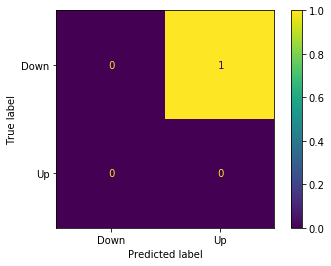

In [147]:
# Predict
y_pred = log_model.predict(X_test)


get_conf(y_test,y_pred,['Down','Up'])

In [148]:
pred=[]
for i in range(Weekly_df.shape[0]):
    index=Weekly_df.index!=i

    X_train=Weekly_df.loc[index,predictors]
    y_train=Weekly_df.loc[index,output]
    X_test=Weekly_df.loc[~index,predictors]
    log_model= LogisticRegression(fit_intercept=True, tol=1e-6).fit(X_train,y_train)
    y_pred = log_model.predict(X_test)
    
    pred.extend(y_pred)

    

[[ 34 450]
 [ 40 565]]
The validation error is:  44.995408631772264 %


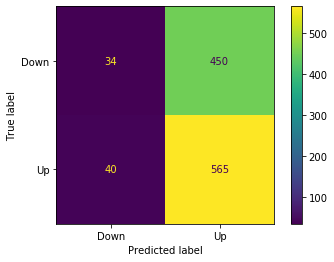

In [149]:

y_pred=np.array(pred)

y_test = Weekly_df[output]
get_conf(y_test,y_pred,['Down','Up'])

The LOOCV estimate for the test error rate is approximately 45%.

The LOOCV has a high miss rate for the Down label so if the market is going Down the model will predict it wrong as up with approximately 93% which is not a good prediction

### Question8:

In [150]:
np.random.seed(1)
mu, sigma = 0, 1 # mean and standard deviation
X = np.random.normal(mu, sigma, 100)
y = X- (2 * (X**2)) + np.random.normal(mu, sigma, 100)

n=100

p=2

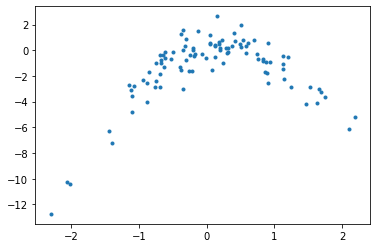

In [151]:
plt.scatter(X, y, marker = '.')
plt.show()

In [152]:
data_df=pd.DataFrame({'X': X, 'y': y})

In [153]:
def sim_8(seed):
    np.random.seed(seed)
    mu, sigma = 0, 1 # mean and standard deviation
    X = np.random.normal(mu, sigma, 100)
    y = X- (2 * (X**2)) + np.random.normal(mu, sigma, 100)
    data_df=pd.DataFrame({'X': X, 'y': y})
    formulas = {'X'  : 'y ~ X', 
                'X^2' : 'y ~ X + np.power(X, 2)',
                'X^3': 'y ~ X + np.power(X, 2) + np.power(X, 3)',
                'X^4' : 'y ~ X + np.power(X, 2) + np.power(X, 3) + np.power(X, 4)'}
    errors = {}
    for f in formulas:
        # predictions 
        y_pred = pd.Series({})
        for i in range(data_df.shape[0]):
            
            train = data_df.index != i

            # Linear regression
            model_ols = smf.ols(formula=formulas[f], data=data_df[train]).fit()

            ## Predict
            y_hat   = model_ols.predict(exog=data_df[~train])
            y_pred  = pd.concat([y_pred, y_hat])
        errors[f] = np.sum(np.square(np.array(y_pred)- y)) / y.size

    display(errors)

In [154]:
sim_8(1)

/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


{'X': 6.260764331604616,
 'X^2': 0.9142897072803661,
 'X^3': 0.926876878164881,
 'X^4': 0.8669116865881077}

In [155]:
sim_8(10)

/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


{'X': 9.429508728455424,
 'X^2': 1.0376998969927407,
 'X^3': 1.071066460073387,
 'X^4': 1.0925510799150582}

Changing the random seed we have changed the sample of observations taken from the datset, so this change in error is due to variance in our sample. In this case the sample size in is small n=100, and so we might expect quite hi high variance between succesive samples. This would lead to variability between the mse errors observed for different samples of X, Y.

#### E) As expected the X^2 has the smallest LOOCV error because the real model is a 2nd order polynomial even for the first model where seed=1 the dramatic decrease in the MSE  when we use X^2 is followed by a slight increase when the cubic term is added to the model and then a slightly decrease when we add the X^4 term due to increase in flexibility.

In [156]:

np.random.seed(1)
mu, sigma = 0, 1 # mean and standard deviation
X = np.random.normal(mu, sigma, 100)
y = X- (2 * (X**2)) + np.random.normal(mu, sigma, 100)
data_df=pd.DataFrame({'X': X, 'y': y})
formulas = {'X'  : 'y ~ X', 
            'X^2' : 'y ~ X + np.power(X, 2)',
            'X^3': 'y ~ X + np.power(X, 2) + np.power(X, 3)',
            'X^4' : 'y ~ X + np.power(X, 2) + np.power(X, 3) + np.power(X, 4)'}
    
for f in formulas:

    
    model_ols = smf.ols(formula=formulas[f], data=data_df[train]).fit()
            
        

    display(model_ols.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     9.590
Date:                Wed, 07 Jul 2021   Prob (F-statistic):            0.00256
Time:                        07:50:57   Log-Likelihood:                -226.85
No. Observations:                  99   AIC:                             457.7
Df Residuals:                      97   BIC:                             462.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4284      0.243     -5.868      0.000      -1.911      -0.945
X              0.8480      0.274      3.097      0.003       0.305       1.391
==============================================================================
Omnibus:                       36.786   Durbin-Watson:                   1.670
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.111
Skew:                          -1.546   Prob(JB):                     1.62e-15
Kurtosis:                       5.638   Cond. No.                         1.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     302.1
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           3.79e-42
Time:                        07:50:57   Log-Likelihood:                -133.16
No. Observations:                  99   AIC:                             272.3
Df Residuals:                      96   BIC:                             280.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1249      0.116      1.076      0.285      -0.106       0.355
X                  1.0864      0.107     10.122      0.000       0.873       1.299
np.power(X, 2)    -1.9820      0.085    -23.263      0.000      -2.151      -1.813
==============================================================================
Omnibus:                        0.808   Durbin-Watson:                   2.168
Prob(Omnibus):                  0.668   Jarque-Bera (JB):                0.460
Skew:                          -0.150   Prob(JB):                        0.795
Kurtosis:                       3.145   Cond. No.                         2.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     203.4
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           3.21e-41
Time:                        07:50:57   Log-Likelihood:                -132.28
No. Observations:                  99   AIC:                             272.6
Df Residuals:                      95   BIC:                             282.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1160      0.116      1.001      0.319      -0.114       0.346
X                  0.8835      0.189      4.686      0.000       0.509       1.258
np.power(X, 2)    -1.9716      0.085    -23.127      0.000      -2.141      -1.802
np.power(X, 3)     0.0850      0.065      1.306      0.195      -0.044       0.214
==============================================================================
Omnibus:                        1.504   Durbin-Watson:                   2.146
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.022
Skew:                          -0.222   Prob(JB):                        0.600
Kurtosis:                       3.223   Cond. No.                         5.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     162.2
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           2.67e-41
Time:                        07:50:57   Log-Likelihood:                -129.19
No. Observations:                  99   AIC:                             268.4
Df Residuals:                      94   BIC:                             281.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3031      0.136      2.227      0.028       0.033       0.573
X                  0.8887      0.184      4.838      0.000       0.524       1.253
np.power(X, 2)    -2.5461      0.248    -10.281      0.000      -3.038      -2.054
np.power(X, 3)     0.1059      0.064      1.655      0.101      -0.021       0.233
np.power(X, 4)     0.1407      0.057      2.462      0.016       0.027       0.254
==============================================================================
Omnibus:                        1.519   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.468   Jarque-Bera (JB):                1.037
Skew:                          -0.225   Prob(JB):                        0.595
Kurtosis:                       3.221   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The p-values show that the linear and quadratic terms are statistically significants and that the cubic and 4th degree terms are not statistically significants . This agree strongly with our cross-validation results which were minimum for the quadratic model.

but why at the quadratic model the intercept is unsignificant?.

### Question9:

In [157]:
boston_df=pd.read_csv("./csv/Boston.csv")
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [158]:
mu_hat = boston_df['medv'].mean()
mu_hat

22.532806324110698

In [159]:
def std_error_mean(df):
    medv = np.array(df)
    SE   = np.std(medv) / np.sqrt(len(medv))
    return SE
std_error_mean(boston_df['medv'])


0.4084569346972866

In [160]:
#C)
def mean_boot(df, idx):
    Z = np.array(df.loc[idx])
    return np.mean(Z)
def samples_idx(n):
    # return the index of bootstrap sample with size n and replacement
     return np.random.randint(low=0, high=n, size=n)

def boot(fn,data,samples):
    results = []
    for s in range(samples):
        Z = fn(data, samples_idx(data.shape[0]))
        results += [Z]
    return np.array(results)

B = 10000
mean_boot = boot(mean_boot, boston_df['medv'], samples=B)
print(mean_boot.mean())
std =np.std(mean_boot)

22.53758353754941


In [161]:
std

0.41015962516561255

In [162]:
#D)
low_mu = round(mu_hat - (2*std),3)
high_mu  = round(mu_hat + (2*std),3)
print(f"The 95% confidence interval for mu is:[{low_mu},{high_mu}]")

The 95% confidence interval for mu is:[21.712,23.353]


In [163]:
#E)
median_hat=boston_df['medv'].median()
median_hat

21.2

In [164]:
#F)
def median_boot(df, idx):
    Z = np.array(df.loc[idx])
    return np.median(Z)

B = 10000
median_boot = boot(median_boot, boston_df['medv'], samples=B)
print(median_boot.mean())
std =np.std(median_boot)
print(std)

21.17889
0.3794533804039697


In [165]:
low_median = round(median_hat - (2*std),3)
high_median  = round(median_hat + (2*std),3)
print(f"The 95% confidence interval for mu is:[{low_median},{high_median}]")

The 95% confidence interval for mu is:[20.441,21.959]


In [166]:
#G)
tenth_percentile = np.percentile(boston_df['medv'], 10)
print('tenth_percentile: ' + str(tenth_percentile))

tenth_percentile: 12.75


In [167]:
def tenth_percentile(df, idx):
    Z = np.array(df.loc[idx])
    return np.percentile(Z,10)


B = 10000
percentile_boot = boot(tenth_percentile, boston_df['medv'], samples=B)
print(percentile_boot.mean())
std =np.std(percentile_boot)

12.764254999999999


In [168]:
print(std)

0.49552451500909617


We got an estimated mu and median and percentile very close to the real values but all with high standard deviation